In [26]:
%matplotlib inline 

import requests 
from io import StringIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy.linalg as lin

In [137]:
#r = requests.get('/Data/CarbonEmisson.csv')
carbon = pd.read_csv('../CSC-Project/Data/carbon.csv',index_col='Country')
carbon.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1062.0,1176.0,1324.0,1434.0,1989.0,904.0,898.0,1466.0,1395.0,1460.0,...,513.0,561.0,513.0,548.0,558.0,559.0,565.0,594.0,608.0,620.0
Albania,4455.0,4446.0,5058.0,4659.0,4875.0,5037.0,5419.0,5725.0,6430.0,7561.0,...,3845.0,4730.0,4389.0,4431.0,4369.0,4227.0,4505.0,4869.0,4739.0,4875.0
Algeria,19383.0,21831.0,31069.0,40176.0,35373.0,33310.0,41740.0,45957.0,51307.0,53420.0,...,89276.0,93457.0,98427.0,102106.0,106292.0,112541.0,114300.0,117063.0,126732.0,132411.0
American Samoa,6.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,18.0,18.0,19.0,19.0,19.0,20.0,20.0,21.0,21.0,21.0
Angola,8707.0,8653.0,9700.0,9813.0,10032.0,9588.0,8545.0,9216.0,10556.0,10520.0,...,17430.0,15886.0,15840.0,16476.0,16306.0,17289.0,18628.0,20824.0,21641.0,22286.0


In [151]:
temperatures = pd.read_csv('../CSC-Project/Data/GlobalLandTemperaturesByCountry.csv', parse_dates=['dt'])
temperatures['dt'] = temperatures['dt'].apply(lambda x: x.year)
temperatures.columns = ['Year', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country']
temperatures.head()

,Year,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743,4.384,2.294,Åland
1,1743,NaN,NaN,Åland
2,1744,NaN,NaN,Åland
3,1744,NaN,NaN,Åland
4,1744,NaN,NaN,Åland


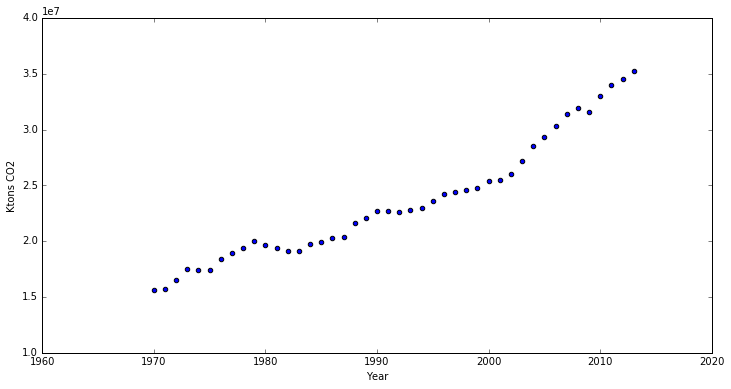

In [148]:
world_data=carbon[carbon.index=='World'].values
plt.figure(figsize=(12, 6))
plt.scatter(range(1970,2014),world_data)
plt.xlabel('Year')
plt.ylabel('Ktons CO2')

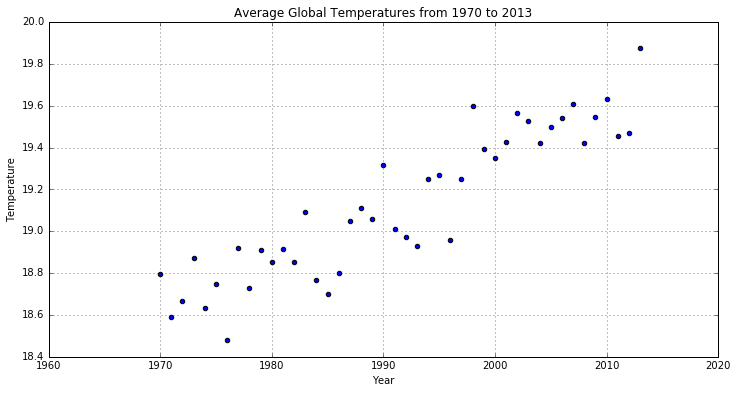

In [162]:
dates = temperatures['Year'].drop_duplicates().values
temps = temperatures.groupby(['Year']).mean()['AverageTemperature'].values
#from 1970 to 2013
dates = dates[-44:]
temps = temps[-44:]
plt.figure(figsize=(12, 6))
plt.scatter(dates, temps)
plt.grid(True)
plt.title("Average Global Temperatures from 1970 to 2013")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()